<a href="https://colab.research.google.com/github/VidyasagarMSC/PyDataFlowNote/blob/main/data_processing/libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benchmarking the modern data processing libraries

In [1]:
# Install required libraries
!pip install pandas dask duckdb modin polars matplotlib fireducks datatable


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.12.0 requires pyarrow<19.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 19.0.1 which is incompatible.
pylibcudf-cu12 24.12.0 requires pyarrow<19.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 19.0.1 which is incompatible.


0.00020694732666015625
['Pandas', 'Dask', 'DuckDB', 'Modin', 'Polars', 'fireducks', 'datatable']
[0.5863087177276611, 0.0046558380126953125, 0.40723395347595215, 0.5804347991943359, 0.10152220726013184, 0.00020694732666015625, 0.1725454330444336]


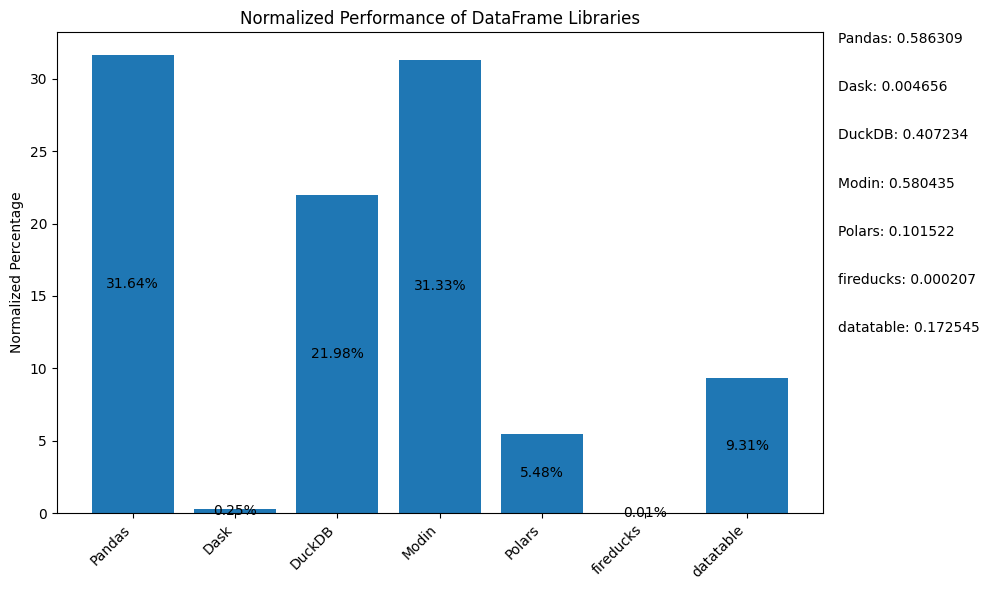

In [4]:
# Import necessary libraries
import time
import pandas as pd
import dask.dataframe as dd
import duckdb
import fireducks.pandas as fpd
import modin.pandas as mpd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import datatable as dt
from matplotlib.ticker import FormatStrFormatter

# Function to create a random dataset
def generate_large_dataframe(n_rows=1000000, n_columns=10):
    data = np.random.rand(n_rows, n_columns)
    df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(n_columns)])
    return df

# Function to benchmark Pandas
def benchmark_pandas(df):
    start_time = time.time()
    result = df.groupby('col_0').sum()
    end_time = time.time()
    return end_time - start_time

# Function to benchmark Dask
def benchmark_dask(df):
    ddf = dd.from_pandas(df, npartitions=4)
    start_time = time.time()
    result = ddf.groupby('col_0').sum()
    end_time = time.time()
    return end_time - start_time

# Function to benchmark Fireducks
def benchmark_fireducks(df):
    fdf = fpd.DataFrame(df)  # Assuming fireducks.pandas has DataFrame like pandas
    start_time = time.time()
    result = fdf.groupby('col_0').sum()
    end_time = time.time()
    return end_time - start_time

# Function to benchmark DuckDB
def benchmark_duckdb(df):
    con = duckdb.connect()
    start_time = time.time()
    # Register the Pandas DataFrame as a DuckDB table and run the GROUP BY query
    con.register('df', df)
    result = con.execute('SELECT col_0, SUM(col_1) FROM df GROUP BY col_0').fetchall()
    end_time = time.time()
    return end_time - start_time

# Function to benchmark Modin
def benchmark_modin(df):
    start_time = time.time()
    result = df.groupby('col_0').sum()
    end_time = time.time()
    return end_time - start_time

# Function to benchmark Polars
def benchmark_polars(df):
    pl_df = pl.from_pandas(df)
    start_time = time.time()
    result = pl_df.group_by('col_0').agg(pl.col('col_1').sum())
    end_time = time.time()
    return end_time - start_time

def benchmark_datatable(df):
    df_dt = dt.Frame(df)
    start_time = time.time()
    result_dt = df_dt[:, dt.sum(dt.f['col_1']), dt.by(dt.f['col_0'])]
    end_time = time.time()
    return end_time- start_time

# Generate a large DataFrame for testing
df = generate_large_dataframe()

# Run benchmarks
pandas_time = benchmark_pandas(df)
dask_time = benchmark_dask(df)
fireducks_time = benchmark_fireducks(df)
print(fireducks_time)
duckdb_time = benchmark_duckdb(df)
modin_time = benchmark_modin(df)
polars_time = benchmark_polars(df)
datatable_time = benchmark_datatable(df)


# Collect results into a list
libraries = ['Pandas', 'Dask', 'DuckDB', 'Modin', 'Polars', 'fireducks', 'datatable']
print(libraries)
times = [pandas_time, dask_time, duckdb_time, modin_time, polars_time,fireducks_time,datatable_time]
print(times)
# Normalize the data
total = sum(times)
normalized = [v / total * 100 for v in times]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(libraries)), normalized, align='center')

# Add labels and title
ax.set_ylabel('Normalized Percentage')
ax.set_title('Normalized Performance of DataFrame Libraries')
ax.set_xticks(range(len(libraries)))
ax.set_xticklabels(libraries, rotation=45, ha='right')

# Add value labels on the bars
for i, v in enumerate(normalized):
    ax.text(i, v/2, f'{v:.2f}%', ha='center', va='center')

# Add a legend with original values
for i, (lib, val) in enumerate(zip(libraries, times)):
    ax.text(1.02, 1 - i*0.1, f'{lib}: {val:.6f}', transform=ax.transAxes, va='top', ha='left')

plt.tight_layout()
plt.show()

In [ ]:
import polars as pl
import pandas as pd
import time

# Sample data
data = {'A': range(1000000), 'B': range(1000000, 2000000)}

# Pandas benchmark
start_time = time.time()
df_pandas = pd.DataFrame(data)
result_pandas = df_pandas.groupby('A').sum()
pandas_time = time.time() - start_time

# Polars benchmark
start_time = time.time()
df_polars = pl.DataFrame(data)
result_polars = df_polars.group_by('A').sum()
polars_time = time.time() - start_time

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Polars time: {polars_time:.4f} seconds")
print(f"Speedup: {pandas_time / polars_time:.2f}x")


Pandas time: 0.1279 seconds
Polars time: 0.0172 seconds
Speedup: 7.45x


In [ ]:
import modin.pandas as mpd
import pandas as pd
import time

# Sample data
data = {'A': range(1000000), 'B': range(1000000, 2000000)}

# Pandas benchmark
start_time = time.time()
df_pandas = pd.DataFrame(data)
result_pandas = df_pandas.groupby('A').sum()
pandas_time = time.time() - start_time

# Modin benchmark
start_time = time.time()
df_modin = mpd.DataFrame(data)
result_modin = df_modin.groupby('A').sum()
modin_time = time.time() - start_time

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Modin time: {modin_time:.4f} seconds")
print(f"Speedup: {pandas_time / modin_time:.2f}x")


Pandas time: 0.1186 seconds
Modin time: 0.1036 seconds
Speedup: 1.14x


In [ ]:
import dask.dataframe as dd
import pandas as pd
import time

# Sample data
data = {'A': range(1000000), 'B': range(1000000, 2000000)}

# Pandas benchmark
start_time = time.time()
df_pandas = pd.DataFrame(data)
result_pandas = df_pandas.groupby('A').sum()
pandas_time = time.time() - start_time

# Dask benchmark
start_time = time.time()
df_dask = dd.from_dict(data, npartitions=4) #dd.from_pandas(df_pandas, npartitions=4)
result_dask = df_dask.groupby('A').sum()
dask_time = time.time() - start_time

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Dask time: {dask_time:.4f} seconds")
print(f"Speedup: {pandas_time / dask_time:.2f}x")


Pandas time: 0.0838 seconds
Dask time: 0.0213 seconds
Speedup: 3.93x


In [ ]:
import fireducks.pandas as fpd
import pandas as pd
import time

# Sample data
data = {'A': range(1000000), 'B': range(1000000, 2000000)}

# Pandas benchmark
start_time = time.time()
df_pandas = pd.DataFrame(data)
result_pandas = df_pandas.groupby('A').sum()
pandas_time = time.time() - start_time

# FireDucks benchmark
start_time = time.time()
df_fireducks = fpd.DataFrame(data)
result_fireducks = df_fireducks.groupby('A').sum()
fireducks_time = time.time() - start_time

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"FireDucks time: {fireducks_time:.4f} seconds")
print(f"Speedup: {pandas_time / fireducks_time:.2f}x")


Pandas time: 0.0754 seconds
FireDucks time: 0.0033 seconds
Speedup: 23.14x


In [ ]:
import duckdb
import pandas as pd
import time

# Sample data
data = {'A': range(1000000), 'B': range(1000000, 2000000)}
df = pd.DataFrame(data)

# Pandas benchmark
start_time = time.time()
result_pandas = df.groupby('A').sum()
pandas_time = time.time() - start_time

# DuckDB benchmark
start_time = time.time()
duckdb_conn = duckdb.connect(':memory:')
duckdb_conn.register('df', df)
result_duckdb = duckdb_conn.execute("SELECT A, SUM(B) FROM df GROUP BY A").fetchdf()
duckdb_time = time.time() - start_time

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"DuckDB time: {duckdb_time:.4f} seconds")
print(f"Speedup: {pandas_time / duckdb_time:.2f}x")

"""
Pandas time: 0.0600 seconds
DuckDB time: 0.2354 seconds
Speedup: 0.25x
"""

Pandas time: 0.0898 seconds
DuckDB time: 0.1698 seconds
Speedup: 0.53x


'\nPandas time: 0.0600 seconds\nDuckDB time: 0.2354 seconds\nSpeedup: 0.25x\n'

In [ ]:
import datatable as dt
import pandas as pd
import time

# Sample data
data = {'A': range(1000000), 'B': range(1000000, 2000000)}

# Pandas benchmark
start_time = time.time()
df_pandas = pd.DataFrame(data)
result_pandas = df_pandas.groupby('A').sum()
pandas_time = time.time() - start_time

# Datatable benchmark
start_time = time.time()
df_dt = dt.Frame(data)
result_dt = df_dt[:, dt.sum(dt.f.B), dt.by(dt.f.A)]
datatable_time = time.time() - start_time

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Datatable time: {datatable_time:.4f} seconds")
print(f"Speedup: {pandas_time / datatable_time:.2f}x")

Pandas time: 0.3050 seconds
Datatable time: 0.0585 seconds
Speedup: 5.21x
